In [1]:
import os

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import set_config
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

from src.config import CATEGORICAL_COL, NUMERICAL_COL, LABEL_COL
from src.utils import plot_metric_curves
from src.transformer import preprocessor_numeric, preprocessor_full

set_config(display="diagram")

# Load Dataset

In [2]:
train = pd.read_csv('../data/users_train.csv')
val = pd.read_csv('../data/users_val.csv')

train.drop(columns=['user_first_engagement','user_pseudo_id'], inplace=True)
val.drop(columns=['user_first_engagement','user_pseudo_id'], inplace=True)

In [3]:
x_train, y_train = train.drop(columns=[LABEL_COL]), train[LABEL_COL]
x_val, y_val = val.drop(columns=[LABEL_COL]), val[LABEL_COL]

# Modeling - Boosting

## Only numeric features
### Model

In [4]:
gb_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor_numeric()),
        ("linear_regressor", GradientBoostingClassifier()),
    ]
)
gb_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['cnt_user_engagement',
                                                   'cnt_level_start_quickplay',
                                                   'cnt_level_end_quickplay',
                                                   'cnt_level_complete_quickplay',
                                                   'cnt_level_reset_quickplay',
                                                   'cnt_post_score',
                                                   'cnt_spend_virtual_currency',
                                                   'cnt_ad_reward',
                                                   'cnt_challenge_a_friend',
                                                   'cnt_completed_5_levels',
                                                   'cnt_use_extra_steps']),
                                                 ('drop', 'drop',
                                                  ['country_name', 'device_os',
                                                   'device_lang'])])),
                ('linear_regressor', GradientBoostingClassifier())])

### Evaluation

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       564
           1       0.50      0.05      0.08       155

    accuracy                           0.78       719
   macro avg       0.65      0.52      0.48       719
weighted avg       0.73      0.78      0.71       719



None

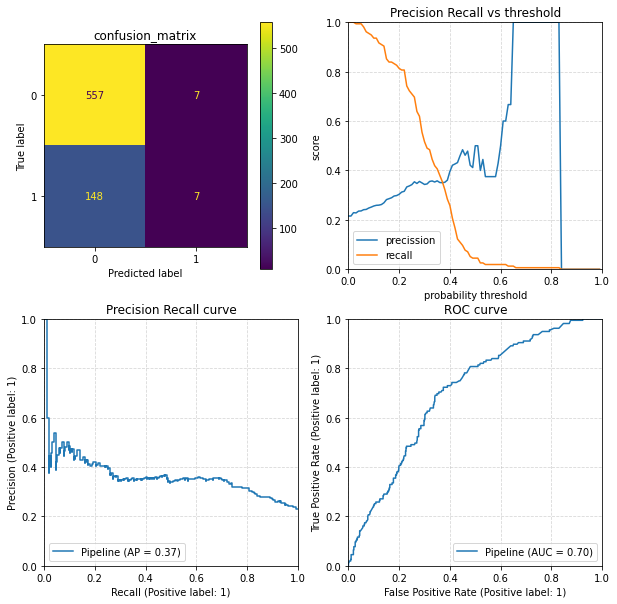

In [5]:
y_val_pred = gb_model.predict(x_val)

display(print(metrics.classification_report(y_val, y_val_pred)))

ax = plot_metric_curves(gb_model, x_val, y_val)

## Numerical and Categorical features
### Transformer

### Modeling

In [6]:
gb_model_full = Pipeline(steps=[('preprocessor', preprocessor_full()),
                      ('linear_regressor', GradientBoostingClassifier())])
gb_model_full.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['cnt_user_engagement',
                                                   'cnt_level_start_quickplay',
                                                   'cnt_level_end_quickplay',
                                                   'cnt_level_complete_quickplay',
                                                   'cnt_level_reset_quickplay',
                                                   'cnt_post_score',
                                                   'cnt_spend_virtual_currency',
                                                   'cnt_ad_reward',
                                                   'cnt_challenge_a_friend',
                                                   'cnt_completed_5_levels',
                                                   'cnt_use_extra_steps']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country_name', 'device_os',
                                                   'device_lang'])])),
                ('linear_regressor', GradientBoostingClassifier())])

### Evaluation

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       564
           1       0.56      0.06      0.11       155

    accuracy                           0.79       719
   macro avg       0.68      0.52      0.49       719
weighted avg       0.74      0.79      0.71       719



None

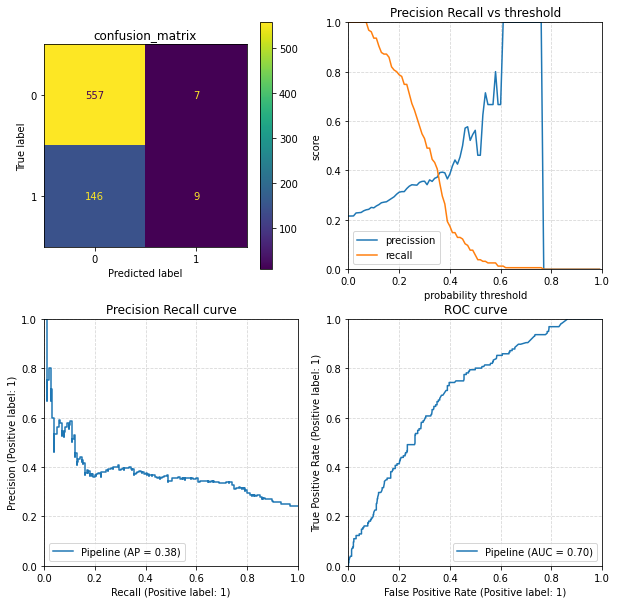

In [7]:
y_val_pred = gb_model_full.predict(x_val)

display(print(metrics.classification_report(y_val, y_val_pred)))

ax = plot_metric_curves(gb_model_full, x_val, y_val)

## Save model 

In [8]:
model_path = 'models'
if not os.path.exists(model_path):
    os.makedirs(model_path)

joblib.dump(gb_model_full, f'{model_path}/gb_model_full.job')

['models/gb_model_full.job']